<a href="https://colab.research.google.com/github/aSafarpoor/AI_Project_BypedalWalker/blob/master/Facebook_SybilSCAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt

import random
random.seed(1)

# Read Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/datasets/SybilSCAR/

/content/drive/MyDrive/datasets/SybilSCAR


In [4]:
!ls

Directed_Pokec	README_SybilSCAR.md  Undirected_Facebook


In [5]:
%cd Undirected_Facebook/

/content/drive/MyDrive/datasets/SybilSCAR/Undirected_Facebook


In [6]:
!ls

Example.txt  graph.txt	test.txt  train.txt


In [7]:
f = open("graph.txt", "r")
edges = []
temp = []
for i in tqdm(f.read().split("\n")):
    try:
        temp.append(i.split()[0])
        temp.append(i.split()[1])
        edges.append([int(temp[-1]),int(temp[-2])])
    except:
        pass

100%|██████████| 353137/353137 [00:00<00:00, 360085.79it/s]


In [8]:
nodes = list(set(temp))

In [9]:
nodes = list(map(int,list(set(nodes))))
print(len(nodes))

8078


In [10]:
f = open("train.txt", "r")
[initbinign,initsybils] = f.read().split("\n")[:2]

In [11]:
initbinign = list(map(int,initbinign.split()))
initsybils = list(map(int,initsybils.split()))

In [12]:
len(initbinign),len(initsybils)

(100, 100)

In [13]:
intersection = list(set(initbinign).intersection(set(initsybils)))
print(len(intersection))
intersection = list(set(nodes).intersection(set(initsybils)))
print(len(intersection))
intersection = list(set(nodes).intersection(set(initbinign)))
print(len(intersection))

0
100
100


# Simple MassagePassing Test

In [14]:
A = np.zeros((len(nodes),len(nodes)))
degree = {}

for e in tqdm(edges):
    A[e[0],e[1]] = 1
    A[e[1],e[0]] = 1

i = 0
for row in A:
    degree[i] = np.sum(row)
    i+=1

100%|██████████| 353136/353136 [00:00<00:00, 775169.48it/s]


In [15]:
round(sum(list(degree.values()))/len(degree),2)

43.72

In [16]:
row_sums = A.sum(axis=0)  # Calculate the sum of each row
A = A / row_sums[np.newaxis,:]

In [17]:
#test,train:
random.shuffle(initbinign)
random.shuffle(initsybils)

btrain = initbinign[:50]
btest = initbinign[50:]
strain = initsybils[:50]
stest = initsybils[50:]

In [18]:
pmatrix = np.ones(len(nodes)) * 0.5
pmatrix = pmatrix.reshape((-1,1))

In [19]:
for x in btrain:
    pmatrix[x] = 0
for x in strain:
    pmatrix[x] = 1

In [20]:
def msg_prop(A,pold,rounds=5,alpha = 1):
    for i in range(rounds):
        pnew = np.dot(A,pold)
        pold = (1-alpha)* pold + alpha* np.copy(pnew)
    return pnew

In [21]:
pnew = msg_prop(np.copy(A),np.copy(pmatrix),rounds=5,alpha=0.5)

In [22]:
sum(pnew),sum(pmatrix)

(array([4039.]), array([4039.]))

In [23]:
def thfunction(pmatrix,th,indexlist):
    x = []
    for i in indexlist:
        if pmatrix[i]>th:
            x.append(1)
        elif pmatrix[i]<th:
            x.append(0)
        else:
            x.append(0.5)
    return np.array(x)

In [24]:
for roundnumber in range(1,20,4):
    for alpha in [0.1,0.3,0.5,0.7,1]:
        pnew = msg_prop(np.copy(A),np.copy(pmatrix),rounds=roundnumber,alpha=alpha)

        outb = thfunction(pnew,th=0.5,indexlist = btest)
        outs = thfunction(pnew,th=0.5,indexlist = stest)

        acc = round((len(outb)-sum(outb)+sum(outs))/(len(outb)+len(outs)),2)
        print(roundnumber,alpha, " ==> ",acc,sum(outb==0.5)+sum(outs==0.5))

1 0.1  ==>  0.55 0
1 0.3  ==>  0.55 0
1 0.5  ==>  0.55 0
1 0.7  ==>  0.55 0
1 1  ==>  0.55 0
41 0.1  ==>  0.5 0
41 0.3  ==>  0.46 0
41 0.5  ==>  0.46 0
41 0.7  ==>  0.46 0
41 1  ==>  0.47 0
81 0.1  ==>  0.47 0
81 0.3  ==>  0.46 0
81 0.5  ==>  0.47 0
81 0.7  ==>  0.46 0
81 1  ==>  0.46 0
121 0.1  ==>  0.46 0
121 0.3  ==>  0.47 0
121 0.5  ==>  0.46 0
121 0.7  ==>  0.46 0
121 1  ==>  0.46 0
161 0.1  ==>  0.46 0
161 0.3  ==>  0.46 0
161 0.5  ==>  0.46 0
161 0.7  ==>  0.46 0
161 1  ==>  0.46 0


In [25]:
import networkx as nx

In [48]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Define subsets B and S
B = set(initbinign)
S = set(initsybils)

colored = B.union(S)
neighbors = []
# Iterate through the nodes in the list and find their neighbors
for colorednode in colored:
    for node in list(G.neighbors(colorednode)):
        if node not in colored:
            neighbors.append(node)

neighbors = set(neighbors)
len(colored),len(neighbors)

(200, 4015)

210
115


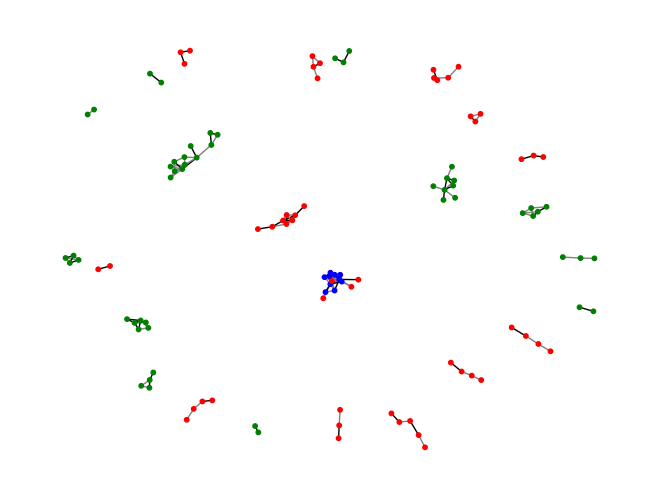

In [55]:
subgraph = nx.Graph()

subgraph_nodes = B.union(S).union(neighbors)

subgraph_edges = [(u, v) for u, v in G.edges() if u in subgraph_nodes and v in subgraph_nodes]
# subgraph_edges = [(u, v) for u, v in G.edges() if u in neighbors or v in neighbors]

subgraph.add_nodes_from(subgraph_nodes)
subgraph.add_edges_from(subgraph_edges)


# Add nodes connected to B or S and the related edges to the new graph
# for node in tqdm(subgraph_nodes):
#     neighbors = set(G.neighbors(node))
#     related_nodes = neighbors.intersection(subgraph_nodes)
#     related_edges = [(node, neighbor) for neighbor in related_nodes]
#     subgraph.add_nodes_from(related_nodes)
#     subgraph.add_edges_from(related_edges)

def remove_alone_nodes(graph):
    alone_nodes = [node for node in graph.nodes() if graph.degree(node) == 0]
    graph.remove_nodes_from(alone_nodes)
    return graph

# Remove alone nodes from graph A
print(len(subgraph.nodes()))
subgraph = remove_alone_nodes(subgraph)
print(len(subgraph.nodes()))

# Draw the subgraph with different colors for nodes in B, nodes in S, and related edges
pos = nx.spring_layout(subgraph)  # You can use different layout algorithms
nx.draw(subgraph, pos, node_color=['green' if node in B else 'red' if node in S else 'blue' for node in subgraph.nodes()],
        edge_color=['black' if edge in subgraph_edges else 'gray' for edge in subgraph.edges()],node_size=10)
plt.show()

4392
4392


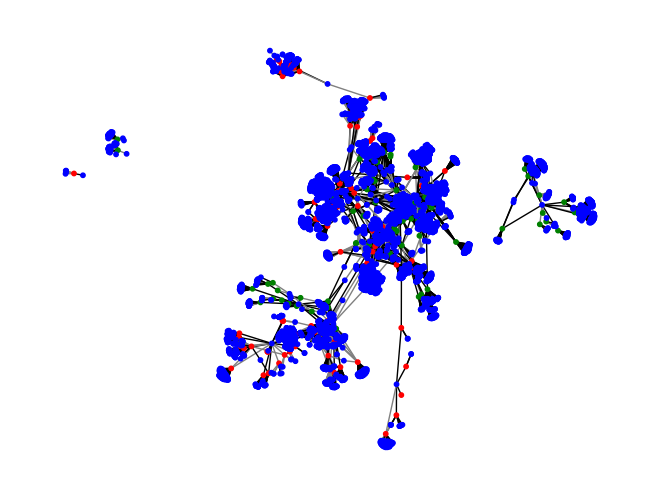

In [63]:
subgraph = nx.Graph()

subgraph_nodes = B.union(S).union(neighbors)

subgraph_edges = [(u, v) for u, v in G.edges() if u in subgraph_nodes or v in subgraph_nodes]
# subgraph_edges = [(u, v) for u, v in G.edges() if u in neighbors or v in neighbors]

subgraph.add_nodes_from(subgraph_nodes)
subgraph.add_edges_from(subgraph_edges)


# Add nodes connected to B or S and the related edges to the new graph
# for node in tqdm(subgraph_nodes):
#     neighbors = set(G.neighbors(node))
#     related_nodes = neighbors.intersection(subgraph_nodes)
#     related_edges = [(node, neighbor) for neighbor in related_nodes]
#     subgraph.add_nodes_from(related_nodes)
#     subgraph.add_edges_from(related_edges)

def remove_alone_nodes(graph):
    alone_nodes = [node for node in graph.nodes() if graph.degree(node) == 0]
    graph.remove_nodes_from(alone_nodes)
    return graph

# Remove alone nodes from graph A
print(len(subgraph.nodes()))
subgraph = remove_alone_nodes(subgraph)
print(len(subgraph.nodes()))

# Draw the subgraph with different colors for nodes in B, nodes in S, and related edges
# pos = nx.spring_layout(subgraph)  # You can use different layout algorithms
nx.draw(subgraph, node_color=['green' if node in B else 'red' if node in S else 'blue' for node in subgraph.nodes()],
        edge_color=['black' if edge in subgraph_edges else 'gray' for edge in subgraph.edges()],node_size=10)
plt.show()

In [67]:
def connected_components_info(graph):
    connected_components = list(nx.connected_components(graph))
    num_connected_components = len(connected_components)
    sizes = [len(component) for component in connected_components]
    return num_connected_components, sizes

# Find the number of connected components and their sizes in graph A
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
num_components, component_sizes = connected_components_info(G)

print("Number of connected components:", num_components)
print("Size of each connected component:", component_sizes)

Number of connected components: 1
Size of each connected component: [8078]


In [68]:
len(nodes),len(edges)

(8078, 353136)